## Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
risky= (df['Taxable.Income']<=30000)
risky.head()

0    False
1    False
2    False
3    False
4    False
Name: Taxable.Income, dtype: bool

In [5]:
df['risky'] = risky
df['risky'] = df['risky']*1
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,risky
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [6]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,risky
0,0,Single,68833,50047,10,1,0
1,1,Divorced,33700,134075,18,1,0
2,0,Married,36925,160205,30,1,0
3,1,Single,50190,193264,15,1,0
4,0,Married,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1,0
596,1,Divorced,69967,55369,2,1,0
597,0,Divorced,47334,154058,0,1,0
598,1,Married,98592,180083,17,0,0


In [7]:
df.drop('Marital.Status',axis=1,inplace=True)
df

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,risky
0,0,68833,50047,10,1,0
1,1,33700,134075,18,1,0
2,0,36925,160205,30,1,0
3,1,50190,193264,15,1,0
4,0,81002,27533,28,0,0
...,...,...,...,...,...,...
595,1,76340,39492,7,1,0
596,1,69967,55369,2,1,0
597,0,47334,154058,0,1,0
598,1,98592,180083,17,0,0


In [8]:
x = df.iloc[:,1:5]
y = df['risky']

In [9]:
x

,Taxable.Income,City.Population,Work.Experience,Urban
0,68833,50047,10,1
1,33700,134075,18,1
2,36925,160205,30,1
3,50190,193264,15,1
4,81002,27533,28,0
...,...,...,...,...
595,76340,39492,7,1
596,69967,55369,2,1
597,47334,154058,0,1
598,98592,180083,17,0


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: risky, Length: 600, dtype: int64

In [11]:
df['risky'].unique()

array([0, 1])

In [12]:
df.risky.value_counts()

0    476
1    124
Name: risky, dtype: int64

In [13]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'risky']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

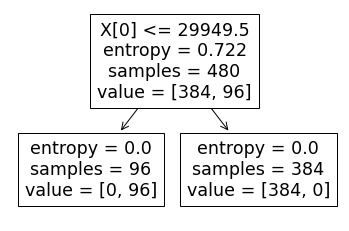

In [16]:
tree.plot_tree(model);

In [17]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    92
1    28
dtype: int64

In [18]:
pd.crosstab(y_test,preds)

col_0,0,1
risky,,
0,92,0
1,0,28


In [19]:
np.mean(preds==y_test)

1.0